Found 681 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.6883 - loss: 1.0798 - val_accuracy: 0.8107 - val_loss: 0.5385
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 668ms/step - accuracy: 0.8088 - loss: 0.5072 - val_accuracy: 0.8107 - val_loss: 0.5067
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 660ms/step - accuracy: 0.8227 - loss: 0.4640 - val_accuracy: 0.8107 - val_loss: 0.4825
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 662ms/step - accuracy: 0.7864 - loss: 0.5020 - val_accuracy: 0.8107 - val_loss: 0.4925
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 660ms/step - accuracy: 0.8153 - loss: 0.4759 - val_accuracy: 0.8107 - val_loss: 0.4762
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 779ms/step - accuracy: 0.7946 - loss: 0.5105 - val_accuracy: 0.8107 - val_loss: 0.4959
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 653ms/step - accuracy: 0.8151 - loss: 0.4614 - val_accuracy: 0.8107 - val_loss: 0.4759
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 661ms/step - accuracy: 0.8127 - loss: 0.4729 - val_accurac

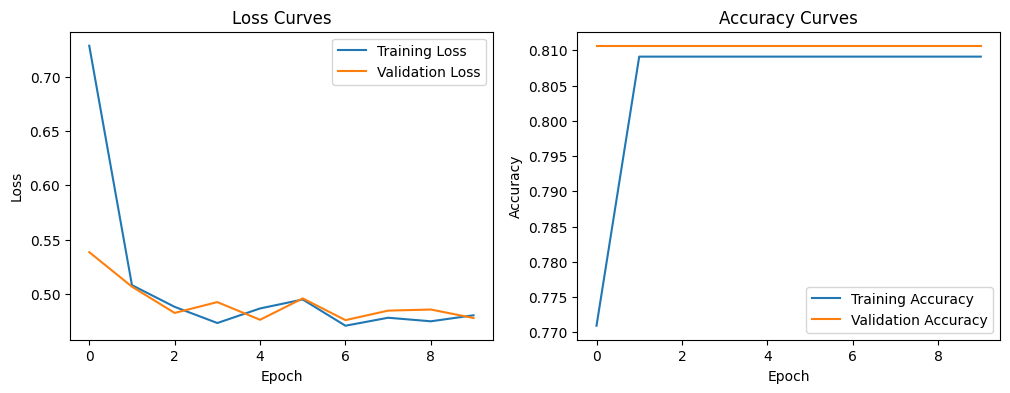

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


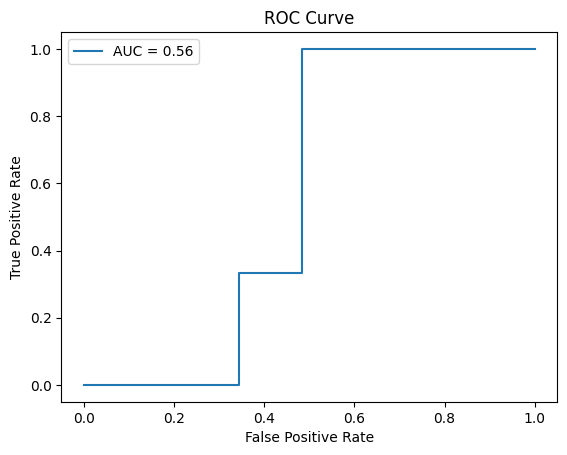

Confusion Matrix:
 [[29  0]
 [ 3  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        29
         1.0       0.00      0.00      0.00         3

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32

Z-test: Z-stat = 8.6090, p-value = 0.0000
T-test: t-stat = -1.4051, p-value = 0.1936


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from scipy import stats
import os


IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
BASELINE_ACC = 0.5


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (3)/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (3)/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (3)/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

val_images, val_labels = next(validation_generator)
val_preds = model.predict(val_images)
val_preds_binary = (val_preds > 0.5).astype(int)
fpr, tpr, _ = roc_curve(val_labels, val_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cm = confusion_matrix(val_labels, val_preds_binary)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(val_labels, val_preds_binary))

val_acc = history.history['val_accuracy'][-1]
n_val = len(validation_generator) * BATCH_SIZE
z_stat = (val_acc - BASELINE_ACC) / np.sqrt(BASELINE_ACC * (1 - BASELINE_ACC) / n_val)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"Z-test: Z-stat = {z_stat:.4f}, p-value = {p_value_z:.4f}")

train_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']
t_stat, p_value_t = stats.ttest_rel(train_accs, val_accs)
print(f"T-test: t-stat = {t_stat:.4f}, p-value = {p_value_t:.4f}")

acc_runs = []
for _ in range(3):
    model_run = create_model()
    history_run = model_run.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=0)
    acc_runs.append(history_run.history['val_accuracy'][-1])

f_stat, p_value_anova = stats.f_oneway(*[np.array([acc] * EPOCHS) for acc in acc_runs])
print(f"ANOVA: F-stat = {f_stat:.4f}, p-value = {p_value_anova:.4f}")

model.save('fashion_cnn_model.h5')
loaded_model = tf.keras.models.load_model('fashion_cnn_model.h5')

test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

n_test = 500
z_stat_test = (test_acc - BASELINE_ACC) / np.sqrt(BASELINE_ACC * (1 - BASELINE_ACC) / n_test)
p_value_test = 2 * (1 - stats.norm.cdf(abs(z_stat_test)))
print(f"Test Z-test: Z-stat = {z_stat_test:.4f}, p-value = {p_value_test:.4f}")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
